Feature Selection and Regression Analysis
$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

Dataset of Gene Expression and Behaviour

In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
dflog = pd.read_csv("data/PFC_22genes_AllBehav.csv")
dflog.head()

,Sample,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,...,SYNJ2,VSTM2L,OF_HPA1_T_AUC,OF_HPA1_Net_AUC,OF_HPA2_T_AUC,OF_HPA2_Net_AUC,OFA1_Total,OFA2_Total,Startle,Group
0,Beta1_F1,3430,1607,2086,30,497,260,482,2023,133,...,2651,1275,1695.0,1338.0,2269.0,1993.0,2631.0,263.0,492.43,Beta
1,Beta2_F1,3193,1683,1751,32,489,136,386,1789,73,...,3080,800,2901.0,1768.0,2336.0,1536.0,1417.0,43.0,712.38,Beta
2,Beta3_F1,4427,2056,1261,14,364,125,346,1289,119,...,2570,1412,1436.0,588.8,2045.0,1868.0,344.0,956.0,360.00,Beta
3,Beta4_F1,3836,2555,1753,30,520,247,482,2737,129,...,3420,803,2327.0,570.6,2821.0,1808.0,551.0,2203.0,148.38,Beta
4,Control1_F1,9818,1733,935,95,2647,120,381,1277,393,...,2713,2490,1729.0,1334.0,2701.0,-12.3,444.0,780.0,141.50,Control


In [3]:
## Separate Gene Expression
data = dflog.loc[:,'ARPP21':'VSTM2L']
data.head()

,ARPP21,ATP6AP1L,B3GALT2,C9orf116,CALB1,CCDC80,CREB3L1,CTXN3,DACH1,GABRA3,...,GPR52,KRT80,NRIP3,PAPPA2,Pdyn,PLA2G2C,SOWAHA,SPON1,SYNJ2,VSTM2L
0,3430,1607,2086,30,497,260,482,2023,133,6661,...,34,88,16732,81,254,171,582,5017,2651,1275
1,3193,1683,1751,32,489,136,386,1789,73,6050,...,36,80,13215,66,362,134,650,5320,3080,800
2,4427,2056,1261,14,364,125,346,1289,119,4921,...,68,72,13871,88,168,122,462,3018,2570,1412
3,3836,2555,1753,30,520,247,482,2737,129,5432,...,56,173,22119,160,437,167,798,3635,3420,803
4,9818,1733,935,95,2647,120,381,1277,393,4692,...,241,953,10578,61,1733,308,2926,3440,2713,2490


In [4]:
#Separate Behavioural Outcome Target
target= dflog.loc[:,'OFA1_Total']
target.head()

0    2631.0
1    1417.0
2     344.0
3     551.0
4     444.0
Name: OFA1_Total, dtype: float64

In [38]:
## RFE Features selection


X = data
y = target
names = data.keys()
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))

Features sorted by their rank:
[(1.0, 'C9orf116'), (2.0, 'GLRA3'), (3.0, 'GPR52'), (4.0, 'CALB1'), (5.0, 'CCDC80'), (6.0, 'PAPPA2'), (7.0, 'DACH1'), (8.0, 'CTXN3'), (9.0, 'VSTM2L'), (10.0, 'SOWAHA'), (11.0, 'KRT80'), (12.0, 'B3GALT2'), (13.0, 'ATP6AP1L'), (14.0, 'GARNL3'), (15.0, 'SPON1'), (16.0, 'PLA2G2C'), (17.0, 'CREB3L1'), (18.0, 'SYNJ2'), (19.0, 'NRIP3'), (20.0, 'GABRA3'), (21.0, 'ARPP21'), (22.0, 'Pdyn')]


In [15]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [7]:
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 


C:\Users\BestBuy\Anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [8]:
result = pd.DataFrame.from_dict(ranks)
result

,Corr.,Lasso,Linear reg,RF,RFE,Ridge,Stability
ARPP21,0.57,0.00,0.00,1.00,0.06,0.00,0.39
ATP6AP1L,0.24,0.01,0.04,0.12,0.53,0.04,0.69
B3GALT2,0.26,0.02,0.07,0.00,0.59,0.07,0.66
C9orf116,0.35,0.83,0.14,0.00,1.00,0.18,0.87
CALB1,0.24,0.01,0.09,0.04,1.00,0.08,0.00
CCDC80,0.07,0.23,0.39,0.15,1.00,0.35,0.79
CREB3L1,0.05,0.15,0.17,0.06,0.29,0.17,0.65
CTXN3,0.03,0.02,0.06,0.04,0.82,0.06,0.04
DACH1,0.18,0.24,0.02,0.08,0.88,0.01,0.74
GABRA3,1.00,0.00,0.01,0.42,0.12,0.00,0.95


In [9]:
result['Mean'] = result.mean(axis=1)

In [10]:
result.sort_values(by ='Mean', ascending= False)

,Corr.,Lasso,Linear reg,RF,RFE,Ridge,Stability,Mean
GLRA3,0.14,1.00,1.00,0.02,1.00,1.00,0.97,0.732857
C9orf116,0.35,0.83,0.14,0.00,1.00,0.18,0.87,0.481429
CCDC80,0.07,0.23,0.39,0.15,1.00,0.35,0.79,0.425714
GPR52,0.46,0.46,0.16,0.09,1.00,0.12,0.57,0.408571
PAPPA2,0.49,0.08,0.08,0.27,0.94,0.07,0.81,0.391429
PLA2G2C,0.51,0.05,0.26,0.25,0.35,0.24,1.00,0.380000
GABRA3,1.00,0.00,0.01,0.42,0.12,0.00,0.95,0.357143
DACH1,0.18,0.24,0.02,0.08,0.88,0.01,0.74,0.307143
ARPP21,0.57,0.00,0.00,1.00,0.06,0.00,0.39,0.288571
VSTM2L,0.10,0.04,0.01,0.03,0.76,0.01,0.81,0.251429


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['GLRA3','C9orf116','GPR52']].values,
                                              (dflog[['OFA1_Total']]).values,random_state=5)

clf = RandomForestRegressor(random_state =0)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the training data.
clf.score(Xlr, ylr)

### If I run this multiple times, I get different answers each time. Why?
### how do I adjust C?

C:\Users\BestBuy\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.66994432051748953

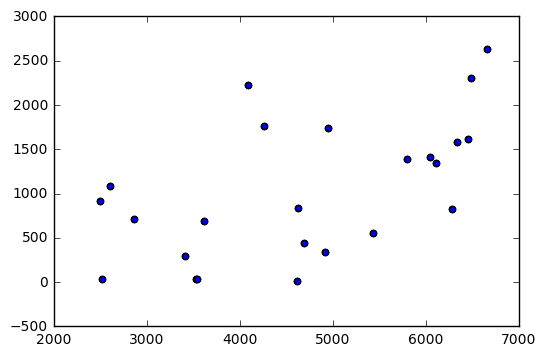

In [30]:
import matplotlib.pyplot as plt
plt.scatter(dflog['GABRA3'], dflog['OFA1_Total'])
plt.show()

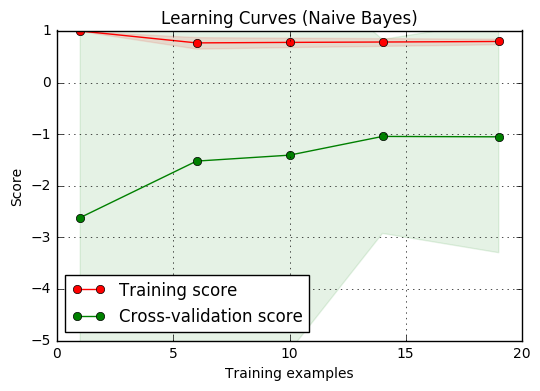

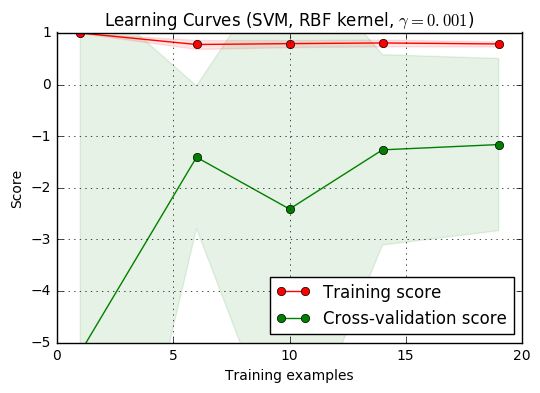

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#digits = load_digits()
#X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

X_subset = X[['GLRA3','C9orf116','GPR52']]
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X_subset, y, ylim=(-5, 1.01), cv=cv, n_jobs=-1)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X_subset, y, (-5, 1.01), cv=cv, n_jobs=-1)

plt.show()

In [46]:
X.shape

(24, 22)

In [24]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

array([[ 30,  71,  43],
       [ 23,  14,  68],
       [ 24,  31,  42],
       [  9,  26,  19],
       [ 17,  25,  17],
       [102,  83, 106]], dtype=int64)

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<ul>
  <li> <b>Exercise:</b> Create a scatter plot of Weight vs. Height
  <li> <b>Exercise:</b> Color the points differently by Gender
</ul>
</div>

### Training and Test Datasets

When fitting models, we would like to ensure two things:

* We have found the best model (in terms of model parameters).
* The model is highly likely to generalize i.e. perform well on unseen data.

<br/>
<div class="span5 alert alert-success">
<h4>Purpose of splitting data into Training/testing sets</h4>
<ul>
  <li> We built our model with the requirement that the model fit the data well. </li>
  <li> As a side-effect, the model will fit <b>THIS</b> dataset well. What about new data? </li>
    <ul>
      <li> We wanted the model for predictions, right?</li>
    </ul>
  <li> One simple solution, leave out some data (for <b>testing</b>) and <b>train</b> the model on the rest </li>
  <li> This also leads directly to the idea of cross-validation, next section. </li>  
</ul>
</div>

First, we try a basic Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [78]:
beta=dflog[dflog.Group =="Beta"]

beta.OFA1_Total.describe()

count      12.000000
mean     1270.458333
std       787.557428
min        14.000000
25%       676.250000
50%      1401.000000
75%      1744.750000
max      2631.000000
Name: OFA1_Total, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['GLRA3','C9orf116','GPR52']].values,
                                              (dflog.Group == "Beta").values,random_state=5)
Xlr


RandomForrestRegressor.fit(Xlr, ylr)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xlr), ylr))

NameError: name 'RandomForrestRegressor' is not defined

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['GABRA3','DACH1','OFA1_Total']].values,
                                              (dflog.Group == "Beta").values,random_state=5)
Xlr

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

ImportError: No module named model_selection

### Tuning the Model

The model has some hyperparameters we can tune for hopefully better performance. For tuning the parameters of your model, you will use a mix of *cross-validation* and *grid search*. In Logistic Regression, the most important parameter to tune is the *regularization parameter* `C`. Note that the regularization parameter is not always part of the logistic regression model. 

The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection.

You will now implement some code to perform model tuning and selecting the regularization parameter $C$.

We use the following `cv_score` function to perform K-fold cross-validation and apply a scoring function to each test fold. In this incarnation we use accuracy score as the default scoring function.

In [80]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 6
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

Below is an example of using the `cv_score` function for a basic logistic regression model without regularization.

In [81]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.666666666667


<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<b>Exercise:</b> Implement the following search procedure to find a good model
<ul>
<li> You are given a list of possible values of `C` below
<li> For each C:
  <ol>
  <li> Create a logistic regression model with that value of C
  <li> Find the average score for this model using the `cv_score` function **only on the training set** `(Xlr, ylr)`
  </ol>
<li> Pick the C with the highest average score
</ul>
Your goal is to find the best model parameters based *only* on the training set, without showing the model test set at all (which is why the test set is also called a *hold-out* set).
</div>

In [84]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
max_score = 0

for C in Cs:
        clf = LogisticRegression(C=C)
        score = cv_score(clf, Xlr, ylr)

        if score > max_score:
            max_score = score
            best_C =C
print max_score, best_C

0.666666666667 1


<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>
**Exercise:** Now you want to estimate how this model will predict on unseen data in the following way:
<ol>
<li> Use the C you obtained from the procedure earlier and train a Logistic Regression on the training data
<li> Calculate the accuracy on the test data
</ol>

<p>You may notice that this particular value of `C` may or may not do as well as simply running the default model on a random train-test split. </p>

<ul>
<li> Do you think that's a problem? 
<li> Why do we need to do this whole cross-validation and grid search stuff anyway?
</ul>

</div>

In [74]:
# your turn
clfl = LogisticRegression(C=0.1)
clfl.fit(Xlr, ylr)
# Print the accuracy from the test data.
print(accuracy_score(clfl.predict(Xtestlr), ytestlr))

## Cross validation is used to minimize the risk of overfitting a model. By optimizing the C value, we find the best model,
## and cross validation allows us to ensure that the model will also generalize to novel data sets. 

0.666666666667


### Black Box Grid Search in `sklearn`

Scikit-learn, as with many other Python packages, provides utilities to perform common operations so you do not have to do it manually. It is important to understand the mechanics of each operation, but at a certain point, you will want to use the utility instead to save time...

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<b>Exercise:</b> Use scikit-learn's [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) tool to perform cross validation and grid search. 

* Instead of writing your own loops above to iterate over the model parameters, can you use GridSearchCV to find the best model over the training set? 
* Does it give you the same best value of `C`?
* How does this model you've obtained perform on the test set?

In [85]:
# your turn
from sklearn.model_selection import GridSearchCV

clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.grid_scores_

## This method gives a different value of C, but it's irrelevant because there are more than 1 value of C that fit the model 
## best. both C=0.1, and C=0.001 are equivalent. 
  

C:\Users\lab\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 {'C': 100},
 0.61111111111111116,
 [mean: 0.55556, std: 0.35978, params: {'C': 0.0001},
  mean: 0.55556, std: 0.21473, params: {'C': 0.001},
  mean: 0.55556, std: 0.21473, params: {'C': 0.1},
  mean: 0.55556, std: 0.21473, params: {'C': 1},
  mean: 0.55556, std: 0.21473, params: {'C': 10},
  mean: 0.61111, std: 0.27588, params: {'C': 100}])

In [86]:
cfl2=LogisticRegression(C=0.001)
clfl2.fit(Xlr, ylr)
print(accuracy_score(clfl2.predict(Xtestlr), ytestlr))


0.5


## A Walkthrough of the Math Behind Logistic Regression